# STUDENT PERFORMANCE INDICATOR

### LIFECYCLE OF ML PROJECT
####  > understanding the problem statement
####  > data collection
####  > checks data to perform 
####  > exploratory data analysis
####  > Data preprocessing
####  > model training
####  > choose best model


### problem statement
##### the problem statement understand the student performance test scores based on the inputs

## import packages


In [40]:
# import require packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [41]:
# reading the dataset 
df=pd.read_csv("data/Student.csv")

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
df.shape

(1000, 8)

#### gender → The student’s gender (e.g., male or female).
#### race/ethnicity → The student’s racial or ethnic background (group categories).
#### parental level of education → The highest education level achieved by the student’s parent(s).
#### lunch → Type of lunch program the student receives (standard or free/reduced).
#### test preparation course → Whether the student completed a test preparation course (none or completed).
#### math score → The student’s score in mathematics.
#### reading score → The student’s score in reading comprehension.
#### writing score → The student’s score in writing. 


In [44]:
# check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [48]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [49]:
print(df["gender"].unique())
print(df["race/ethnicity"].unique())
print(df["parental level of education"].unique())
print(df["lunch"].unique())
print(df["test preparation course"].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [50]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]


In [51]:
print("the categorical features are:",categorical_features)
print("the numerical features are: ",numeric_features) 

the categorical features are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
the numerical features are:  ['math score', 'reading score', 'writing score']


In [52]:
df["total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [53]:
reading_full=df[df["reading score"]==100]["average"].count()
writing_full=df[df["writing score"]==100]["average"].count()
maths_full=df[df["math score"]==100]["average"].count()

print("no. of students got full marks in maths:",maths_full)
print("no. of students got full marks in reading:",reading_full)
print("no. of students got full marks in writing:",writing_full)


no. of students got full marks in maths: 7
no. of students got full marks in reading: 17
no. of students got full marks in writing: 14


## DATA VISUALIZATION


<Axes: xlabel='average', ylabel='Count'>

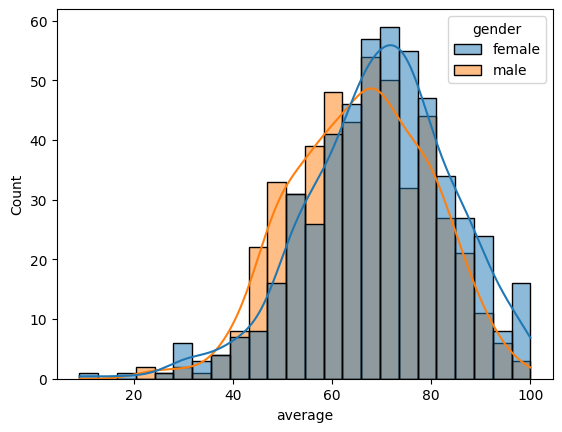

In [54]:
#histogram with kde plot
sns.histplot(data=df,x="average",hue="gender",kde=True)

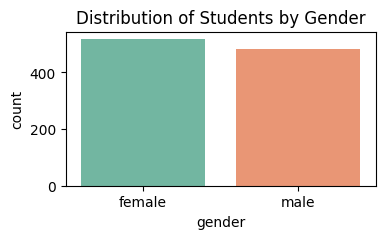

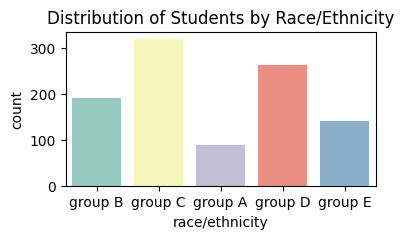

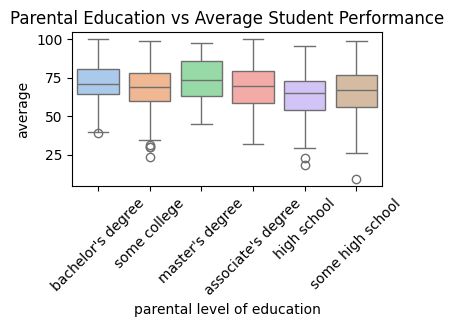

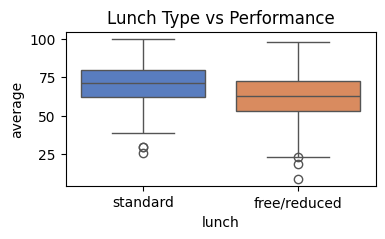

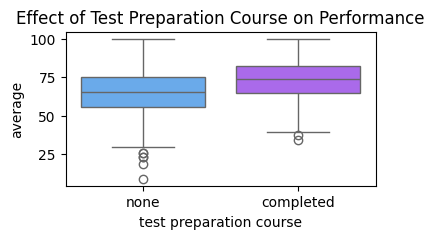

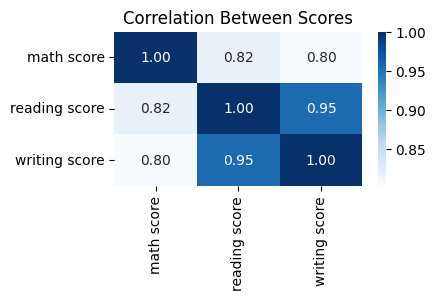

In [56]:

# 1. Gender distribution
plt.figure(figsize=(4,2))
sns.countplot(data=df, x="gender", palette="Set2")
plt.title("Distribution of Students by Gender")
plt.show()

# 2. Race/Ethnicity distribution
plt.figure(figsize=(4,2))
sns.countplot(data=df, x="race/ethnicity", palette="Set3")
plt.title("Distribution of Students by Race/Ethnicity")
plt.show()

# 3. Parental Education Level vs Average Score
plt.figure(figsize=(4,2))
sns.boxplot(data=df, x="parental level of education", y="average", palette="pastel")
plt.xticks(rotation=45)
plt.title("Parental Education vs Average Student Performance")
plt.show()

# 4. Lunch type vs Average Score
plt.figure(figsize=(4,2))
sns.boxplot(data=df, x="lunch", y="average", palette="muted")
plt.title("Lunch Type vs Performance")
plt.show()

# 5. Test Preparation Course Effect
plt.figure(figsize=(4,2))
sns.boxplot(data=df, x="test preparation course", y="average", palette="cool")
plt.title("Effect of Test Preparation Course on Performance")
plt.show()

# 6. Correlation Heatmap between scores
plt.figure(figsize=(4,2))
sns.heatmap(df[["math score","reading score","writing score"]].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()


In [57]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
